In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('datasets/cancer.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
x = dataset.iloc[:,2:32].values
y = dataset.iloc[:,1].values
y = np.where(y == 'M', 0, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

n , d = X_train.shape

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)

In [6]:
def model_with_optimizers(optimizer):
    model = Sequential()
    model.add(Dense(15, input_shape=(d,), activation='sigmoid'))
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    hist = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val),epochs=100, verbose=0)
    return hist

In [7]:
def plots(hist):
    plt.plot(hist.history['loss'],label='loss')
    plt.plot(hist.history['val_loss'],label='val_loss')
    plt.title("loss Vs Validation loss")
    plt.legend()
    plt.show()

    plt.plot(hist.history['accuracy'],label='acc')
    plt.plot(hist.history['val_accuracy'],label='val_acc')
    plt.title("Accuracy")
    plt.legend()
    plt.show()

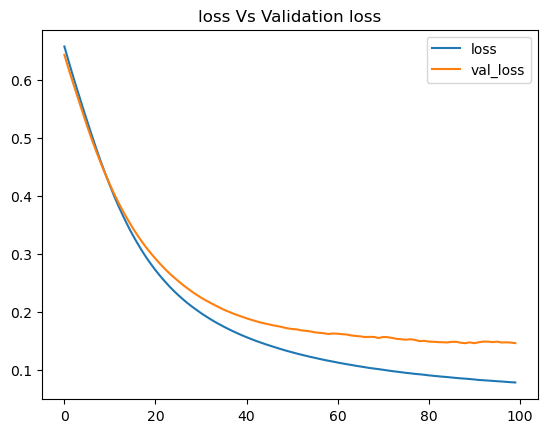

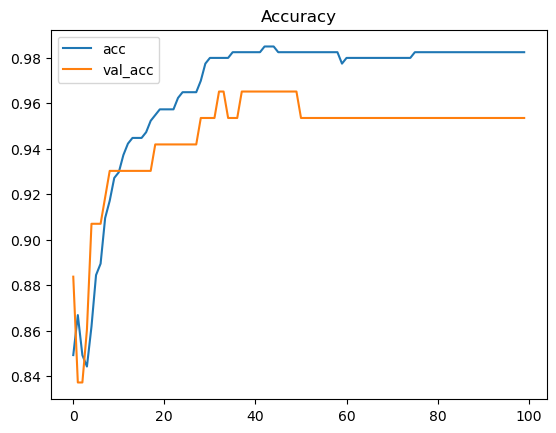

In [8]:
hist = model_with_optimizers('adam')
plots(hist)

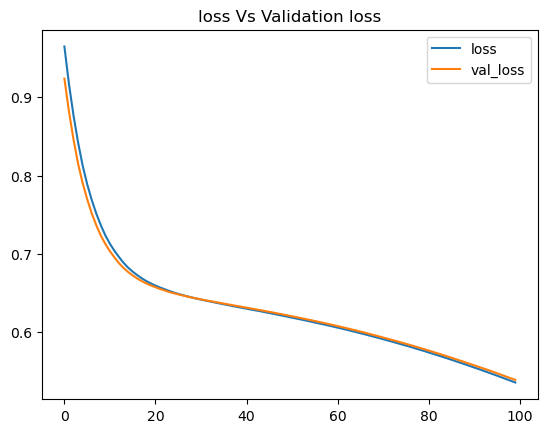

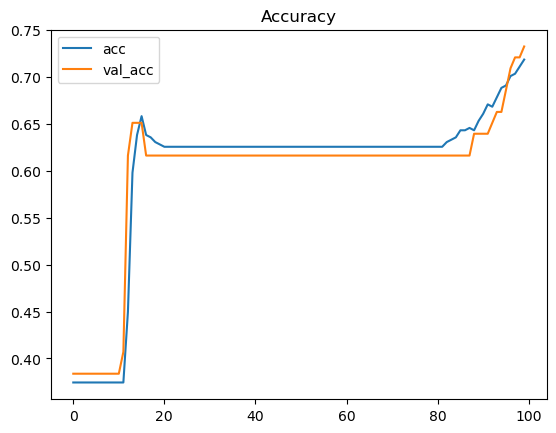

In [9]:
hist = model_with_optimizers('sgd')
plots(hist)

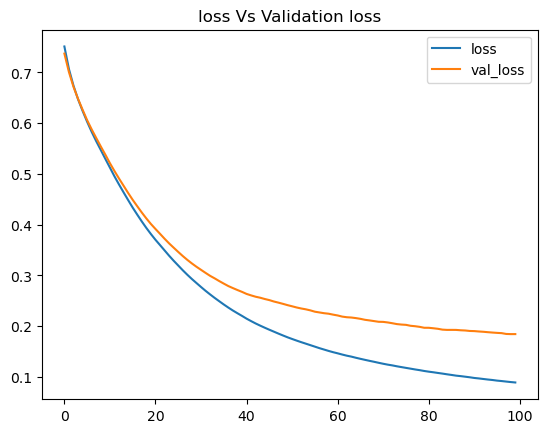

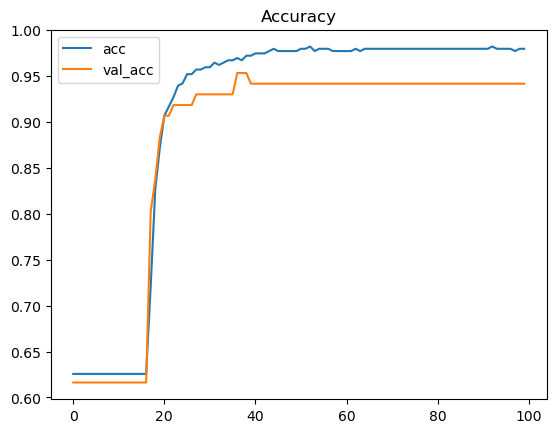

In [10]:
hist = model_with_optimizers('rmsprop')
plots(hist)

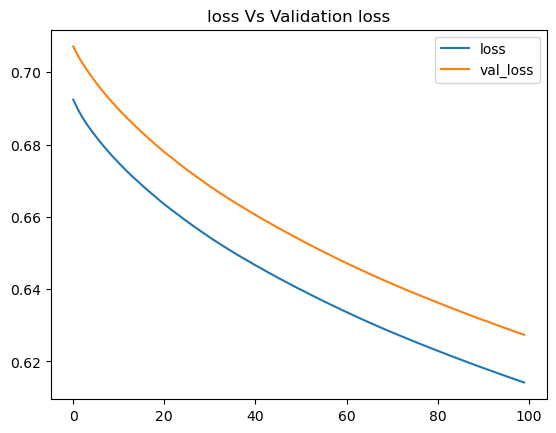

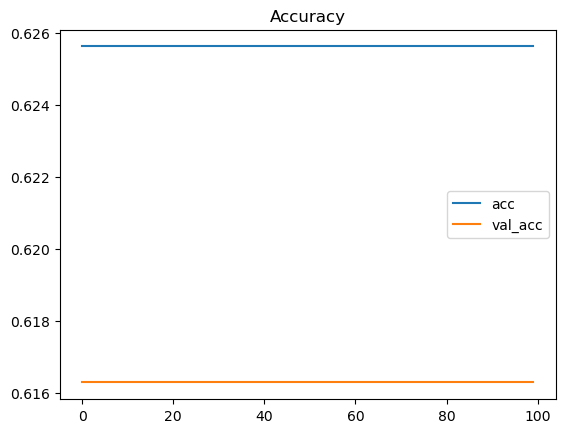

In [11]:
hist = model_with_optimizers('adagrad') 
plots(hist)

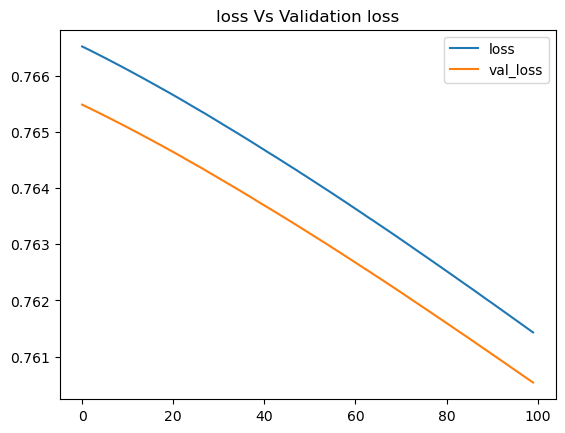

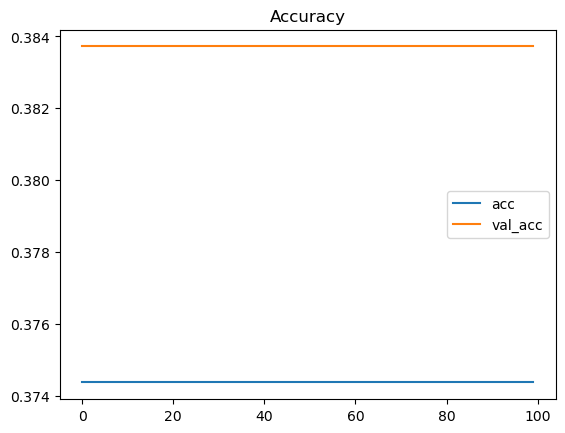

In [12]:
hist = model_with_optimizers('adadelta')    
plots(hist)

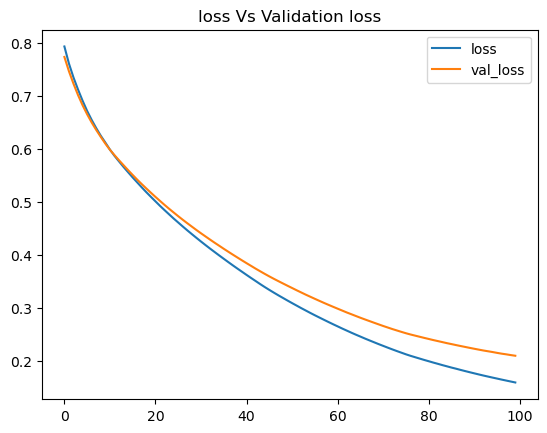

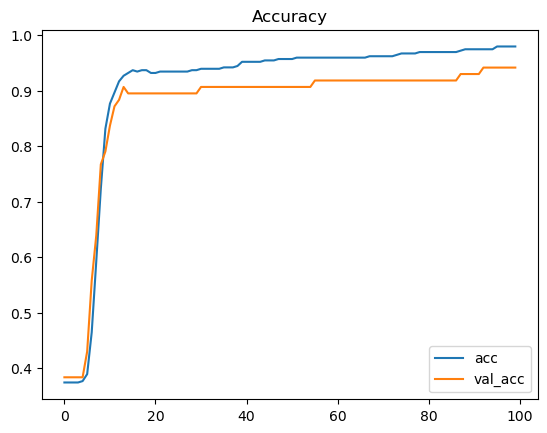

In [13]:
hist = model_with_optimizers('adamax')
plots(hist)

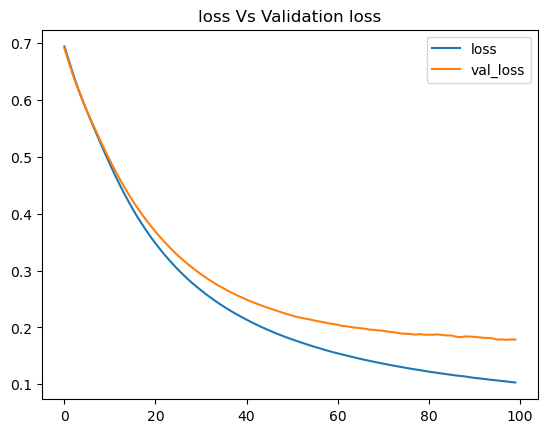

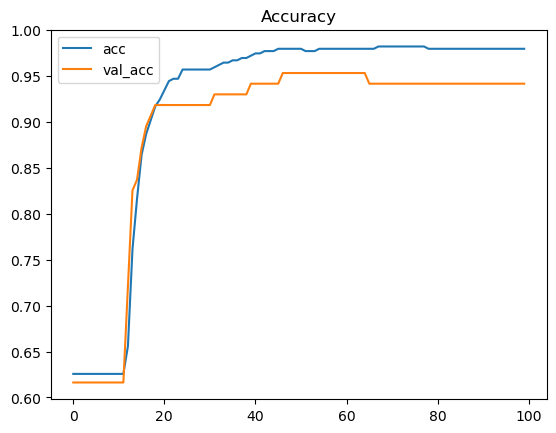

In [14]:
hist = model_with_optimizers('nadam')
plots(hist)